## Análise dos microdados do ENEM 2022

In [1]:
# Instalação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import watermark

In [2]:
# Verificando a versão dos pacotes
%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

numpy     : 1.21.5
watermark : 2.3.1
re        : 2.2.1
pandas    : 1.4.2
seaborn   : 0.11.2
matplotlib: 3.5.1



In [3]:
df = pd.read_csv("dados\MICRODADOS_ENEM_2022.csv",sep=';',encoding='ISO-8859-1')

In [4]:
df.shape

(3476105, 76)

In [5]:
# Verificando os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [6]:
# Aumentando a visualização de linhas
pd.options.display.max_rows = 100

In [7]:
# Verificando se há valores nulos
df.isnull().sum()

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2213361
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2524161
NO_MUNICIPIO_ESC          2524161
CO_UF_ESC                 2524161
SG_UF_ESC                 2524161
TP_DEPENDENCIA_ADM_ESC    2524161
TP_LOCALIZACAO_ESC        2524161
TP_SIT_FUNC_ESC           2524161
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN               1120710
CO_PROVA_CH                982663
CO_PROVA_LC   

In [8]:
pd.options.display.max_columns = 76

In [9]:
# Verificando as 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [10]:
# Verificando uma amostra dos dados
df.sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1831455,210055975635,2022,9,F,2,1,1,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3171303,Viçosa,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,D,D,2,B,A,C,C,A,A,B,B,B,A,A,A,B,A,A,A,C,A,C,B
22964,210055919530,2022,11,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,E,D,4,J,A,D,E,B,A,B,A,B,A,B,A,B,C,A,B,E,A,B,B
3276235,210055381376,2022,7,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3136702,Juiz de Fora,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,F,C,F,4,H,A,C,D,B,A,B,A,B,B,A,A,A,C,A,A,E,A,B,B
1259838,210057996713,2022,5,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,F,B,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
1185752,210057750989,2022,2,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926608,Ribeira do Pombal,29,BA,1,1,1,1,1086.0,1055.0,1065.0,1076.0,442.9,418.5,382.5,407.5,DA*BEAEADCDAAEBBCEDEAEADABEBBDCABCEBEABDBACAD,DDAEADDEACBDBEEDCADBEABDDCABAAADBEDBDCAECEACE,CDBEADCEBAEDDDEABDBDABABEDADDCDEBCACBADDCAECE,CDDBEACDBEACDBEDABEBCEEEADBBCBDBAADABDCCEADDB,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.0,60.0,100.0,80.0,100.0,40.0,380.0,E,B,C,F,5,B,A,B,D,B,B,B,A,A,A,A,A,A,C,B,A,E,A,A,B


### EDA- Parte 1

#### Separação das Variáveis Categóricas e Numéricas

In [11]:
df.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

In [26]:
# Lista de colunas categóricas
cats = [ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA',
        'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
        'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [21]:
nums = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

### Explorando as variáveis numéricas

In [22]:
# Resumo das variáveis numéricas
df[nums].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06,2.493442e+06
mean,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,1.193923e+02,1.409609e+02,1.148686e+02,1.294384e+02,1.138195e+02,6.184797e+02
std,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,3.700626e+01,5.353708e+01,4.102659e+01,4.268095e+01,5.982160e+01,2.122125e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02
50%,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,1.200000e+02,1.400000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.200000e+02
75%,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,1.400000e+02,2.000000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.600000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


<AxesSubplot:>

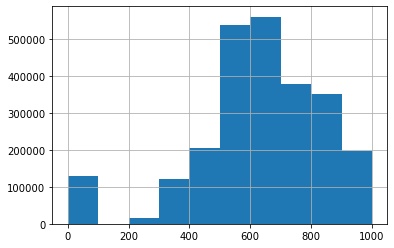

In [23]:
df['NU_NOTA_REDACAO'].hist()

### Explorando as variáveis categóricas

In [28]:
df = df.astype(object)

In [29]:
# Resumo das variáveis numéricas
df[cats].describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,1262744.0,3476105,951944.0,951944,951944.0,951944,951944.0,951944.0,951944.0,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,2355395.0,2493442.0,2493442.0,2355395.0,2355395,2493442,2493442,2355395,3476105,2355395,2493442,2493442,2355395,2493442.0,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105
unique,1,20,2,5,6,5,4,17,3,2.0,2,5537.0,5265,27.0,27,4.0,2.0,4.0,1747,1712,27,27,3,3,3,3,14.0,14.0,14.0,14.0,2353812,2487727,2491292,2353886,2,9,8,9,8,8.0,8,8,6,6,20,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,2022,3,F,1,3,1,1,0,1,1.0,0,3550308.0,São Paulo,35.0,SP,2.0,1.0,1.0,3550308,São Paulo,35,SP,1,1,1,1,1087.0,1057.0,1068.0,1078.0,.............................................,.............................................,.............................................,.............................................,0,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,E,E,C,B,4,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B
freq,3476105,805862,2120519,3127949,1488844,3393163,1633253,2005683,2158545,1255177.0,2963373,46819.0,46819,184295.0,184295,666020.0,918409.0,945049.0,147046,147046,544442,544442,2355395,2493442,2493442,2355395,586191.0,621146.0,621146.0,586191.0,514,4471,1767,543,1900028,593897,630531,629529,594846,2363615.0,1002676,1217025,803761,1418325,1150237,1022869,3171295,2242899,1711388,1786665,2612969,3229827,1851450,2190393,3002575,1739763,3357031,2613530,2247418,2886368,2681865,1056875,3049683,1606940,3149732


In [31]:
# Listando o total de registros por categoria de cada variável categórica
for col in cats:
    print(f'Total de Registros po categoria da variável {col}:')
    print(df[col].value_counts())
    print()

Total de Registros po categoria da variável NU_ANO:
2022    3476105
Name: NU_ANO, dtype: int64

Total de Registros po categoria da variável TP_FAIXA_ETARIA:
3     805862
2     711278
4     408115
1     303605
5     247679
11    189700
6     165982
7     123260
12    103634
8      94849
13     74162
9      73338
10     61564
14     49735
15     30066
16     17688
17      9688
18      3817
19      1505
20       578
Name: TP_FAIXA_ETARIA, dtype: int64

Total de Registros po categoria da variável TP_SEXO:
F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

Total de Registros po categoria da variável TP_ESTADO_CIVIL:
1    3127949
2     165719
0     128493
3      50380
4       3564
Name: TP_ESTADO_CIVIL, dtype: int64

Total de Registros po categoria da variável TP_COR_RACA:
3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: TP_COR_RACA, dtype: int64

Total de Registros po categoria da variável TP_NACIONALIDADE:
1    3393163
2      68522
4       7044
3     

.............................................    4471
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA     202
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC     154
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD     135
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB      90
                                                 ... 
DEBBACDBDCDBDADBCCEABADECDDCDCBDEECAEDBADEEDE       1
DEDCABBECCDCAABBDCCDDEBCADCCDEBCBDEDCBBAADBAB       1
EAAABADDBDBCEAAACBDBACADACDAAEADDCBABBBCDAEBA       1
DBECBCCEBDBCADEECADBBDACECDDAEBCDBAABDECACEBC       1
DBBCEDBCDBCCACEDACABEADDAECEABDECBEDAEEDADEAB       1
Name: TX_RESPOSTAS_CH, Length: 2487727, dtype: int64

Total de Registros po categoria da variável TX_RESPOSTAS_LC:
.............................................    1767
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA      74
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC      46
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD      30
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB      29
                     

A    1606940
B    1329603
C     346479
D     129391
E      63692
Name: Q024, dtype: int64

Total de Registros po categoria da variável Q025:
B    3149732
A     326373
Name: Q025, dtype: int64

